<a href="https://colab.research.google.com/github/Shahidazad/Pytorch/blob/main/Deep_NN_on_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import torchvision
from torchvision.datasets import  MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import  SubsetRandomSampler
from  torch.utils.data.dataloader import DataLoader


In [2]:
dataset = MNIST(root='data/', # in folder
                download=True,
                transform =ToTensor()) # convt img,png to tensor

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
# torch.size [1,28,28] 1 channel (gray scale is 1 channel RGB is 3 channel)
img,label=dataset[0]
img.shape,label

(torch.Size([1, 28, 28]), 5)

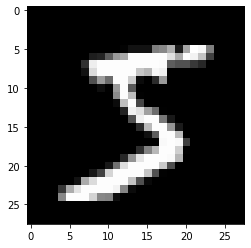

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img[0],cmap='gray')

In [5]:
img[0,10:19,10:20]

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824, 0.6275, 0.4235, 0.0039, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412, 0.9922, 0.9922, 0.4667, 0.0980,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1765, 0.7294, 0.9922, 0.9922, 0.5882,
         0.1059],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0627, 0.3647, 0.9882, 0.9922,
         0.7333],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9765, 0.9922,
         0.9765],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1804, 0.5098, 0.7176, 0.9922, 0.9922,
         0.8118]])

In [6]:
# tells create functn for for spliting validation and training
def  split_indices(n,val_pct):
  # size of  validation set
  n_val=int(val_pct*n)
  # create random permutation of 0,n-1
  idxs=np.random.permutation(n)
  # pick first n_val indices for  validation set
  return idxs[n_val:], idxs[:n_val]

In [7]:

train_indices,val_indices = split_indices(len(dataset),val_pct=0.2)
print(len(train_indices),len(val_indices))
print('sample val indices',val_indices[:20])

48000 12000
sample val indices [40396 51601 39514 39965 48712 51506  4417 51361 50849 49567 33456 35784
 37415 22603 22446  9360 20930 50245 21920 29878]


In [8]:
batch_size=100
# training sampler data loader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset,
                      batch_size,
                      sampler=train_sampler)
# validation sampler data loader
valid_sampler = SubsetRandomSampler(val_indices)
valid_dl = DataLoader(dataset,
                      batch_size,
                      sampler = valid_sampler)

In [9]:
import torch.nn.functional as F
import torch.nn as nn

In [10]:
for xb,yb in train_dl:
  xb=xb.view(xb.size(0),-1) # reshape(view)
  print(xb.shape)
  break



torch.Size([100, 784])


In [11]:
class MnistModel(nn.Module):
  def __init__(self,in_size,hidden_size,out_size):
    super().__init__()
    # hidden layer
    self.linear1= nn.Linear(in_size,hidden_size)
    # output layer
    self.linear2=nn.Linear(hidden_size,out_size)

  def forward(self,xb):
    xb=xb.view(xb.size(0),-1) # reshape
    # get intermediate out put using hidden layer
    out= self.linear1(xb)
    # activation function
    out=F.relu(out)
    # get prediction using output layer
    out=self.linear2(out)
    return out

In [12]:
# model create  # hidden layer with 32 activation
input_size=784
num_classes=10
model=MnistModel(input_size,hidden_size=32,out_size=num_classes)

In [13]:
for t in model.parameters():
  print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [14]:
for images,labels in train_dl:
  print('images.shape',images.shape)
  outputs=model(images)
  loss =  F.cross_entropy(outputs,labels)
  print('loss', loss.item())
  break

print('output shape',outputs.shape)
print('sample output :/n',outputs[:2].data)

images.shape torch.Size([100, 1, 28, 28])
loss 2.3052473068237305
output shape torch.Size([100, 10])
sample output :/n tensor([[-0.2355,  0.0321, -0.1836,  0.1592,  0.1398, -0.0769,  0.0429, -0.0958,
         -0.0451, -0.1857],
        [-0.1363, -0.1003, -0.1554,  0.0194,  0.0704, -0.0547, -0.1152, -0.2961,
         -0.0050, -0.2491]])


In [15]:
  # use GPU for large data
torch.cuda.is_available()

True

In [16]:
def get_default_device():
  """pick GPU is available else CPU"""
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')


In [17]:
device=get_default_device()
device

device(type='cuda')

In [18]:
def to_device(data,device):
  """move tensor to chosen device"""
  if isinstance(data,(list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device,non_blocking=True)


In [19]:
for images,labels in train_dl:
  print(images.shape)
  images= to_device(images,device)
  print(images.device)
  break

torch.Size([100, 1, 28, 28])
cuda:0


In [20]:
class DeviceDataLoader():
  """wrap dataloader  to move  to device"""
  def __init__(self,dl,device):
    self.dl= dl
    self.device =device

  def __iter__(self):
    """yield batch of data after moving to device"""
    for b in self.dl:
      yield to_device(b,self.device)

  def __len__(self):
    """number of batches"""
    return len(self.dl)

In [21]:
train_dl=DeviceDataLoader(train_dl,device)
valid_dl=DeviceDataLoader(valid_dl,device)

In [22]:
for xb,yb in valid_dl:
  print('xb.device:',xb.device)
  print('yb:',yb)
  break

xb.device: cuda:0
yb: tensor([7, 3, 1, 1, 8, 1, 1, 1, 6, 8, 9, 9, 8, 7, 2, 4, 7, 2, 1, 8, 8, 4, 1, 1,
        5, 8, 5, 0, 1, 9, 1, 2, 2, 8, 5, 3, 8, 5, 6, 6, 4, 6, 4, 3, 4, 1, 6, 3,
        7, 6, 8, 4, 4, 9, 4, 4, 4, 1, 9, 9, 7, 6, 2, 5, 1, 8, 2, 2, 8, 3, 8, 3,
        8, 3, 6, 2, 9, 2, 1, 4, 1, 6, 8, 9, 1, 3, 8, 5, 7, 6, 4, 2, 7, 9, 7, 1,
        9, 5, 7, 9], device='cuda:0')


In [23]:
# Train model
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):
  # generate prediction
  preds= model(xb)
  # calculate loss
  loss=loss_func(preds,yb)
  if  opt is not None:
    # compute gradient
    loss.backward()
    # update parameter
    opt.step()
    # reset gradient
    opt.zero_grad()

  metric_result= None
  if metric is not None:
    metric_result = metric(preds,yb)
  
  return loss.item(),len(xb),metric_result



In [24]:
def evaluate(model,loss_fn,valid_dl,metric=None):
  with torch.no_grad():
    # pass each batch throught  model
    results= [loss_batch(model,loss_fn,xb,yb,metric=metric)
    for xb,yb in valid_dl]

    # separate loss, count, metrics
    losses,nums,metrics=zip(*results)
    # total size of the dataset
    total=np.sum(nums)
    # avg loss across batches
    avg_loss = np.sum(np.multiply(losses,nums))/total
    avg_metric=None
    if metric is not None:
      # avg of  metric across  batches
      avg_metric=np.sum(np.multiply(metrics,nums))/total

    return avg_loss,total,avg_metric


In [25]:

def fit(epochs,lr,model,loss_fn,train_dl,valid_dl,metric=None,opt_fn=None):
  losses,metrics=[],[]
  # instantial optimizer
  if opt_fn is None: opt_fn=torch.optim.SGD
  opt=opt_fn(model.parameters(),lr=lr)

  for epoch in range(epochs):
    # training
    for xb,yb in train_dl:
      loss_batch(model,loss_fn,xb,yb,opt)

    # evaluation
    result= evaluate(model,loss_fn,valid_dl,metric)
    val_loss,total,val_metric=result

    # record lose  and metric
    losses.append(val_loss)
    metrics.append(val_metric)
    
    if metric is None:
      print('epoch [{}/{}],Loss:{:.4f}'.format(epoch+1,epochs,val_loss))
    else:
      print("epoch [{}/{}],loss:{:.4f},{}:{:.4f}".format(epoch+1,epochs,val_loss,metric.__name__,val_metric))
  return losses,metrics



In [26]:
def accuracy(outputs,labels):
  _,preds =torch.max(outputs,dim=1)
  return torch.sum(preds==labels).item() / len(preds)


In [27]:
# model on GPU
model= MnistModel(input_size,hidden_size=32,out_size=num_classes)
to_device(model,device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [28]:
val_loss,total,val_acc = evaluate(model,F.cross_entropy,valid_dl,metric=accuracy)
print("Loss :{:.4f}, accuracy:{:.4f}".format(val_loss,val_acc))

Loss :2.3080, accuracy:0.0779


In [29]:
losses1,metrics1 = fit(5,0.5,model,F.cross_entropy,train_dl,valid_dl,accuracy)

epoch [1/5],loss:0.2062,accuracy:0.9411
epoch [2/5],loss:0.1575,accuracy:0.9533
epoch [3/5],loss:0.1484,accuracy:0.9589
epoch [4/5],loss:0.1523,accuracy:0.9573
epoch [5/5],loss:0.1378,accuracy:0.9606


In [30]:
losses2 ,metrics2 =fit(5,0.1,model,F.cross_entropy,train_dl,valid_dl,accuracy)

epoch [1/5],loss:0.1149,accuracy:0.9672
epoch [2/5],loss:0.1150,accuracy:0.9672
epoch [3/5],loss:0.1147,accuracy:0.9671
epoch [4/5],loss:0.1121,accuracy:0.9676
epoch [5/5],loss:0.1119,accuracy:0.9677


Text(0.5, 1.0, 'accuracy VS  num of epochs')

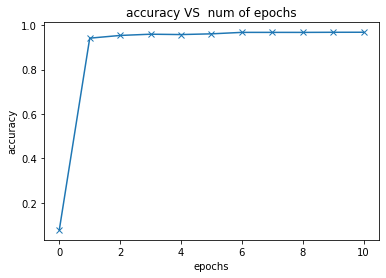

In [31]:
accuracies = [val_acc] +metrics1 + metrics2
plt.plot(accuracies,'-x')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy VS  num of epochs')

In [31]:
# model have 1 hidden layer
# changing the size of the hidden layer adding more hidden layer changing the batch size changing the learning rate
